In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


def plot_emirical_cdf(sample):
    hist, edges = np.histogram(sample, bins=len(sample))
    y = hist.cumsum()
    y = y/50
    for i in range(len(y)):
        plt.plot([edges[i], edges[i+1]], [y[i], y[i]], c="red")
    plt.show()


df = pd.read_csv('Dataframe.csv', sep=' ')
df = df.drop(df[df.iris_species != 'setosa'].index)
# 2.1
print('№2')
sample_mean = (df['petal_width'].sum()) / df.shape[0]
sample_variance = 0
for i in range(df.shape[0]):
    sample_variance += (sample_mean - df['petal_width'][i])**2
sample_variance = sample_variance / df.shape[0]
unbiased_sample_variance = sample_variance * (df.shape[0] / (df.shape[0] - 1))
df = df.sort_values("petal_width")  # Вариационный ряд
df = df.reset_index()
n = 0
p = df.shape[0] % 2
if p == 0:
    n = df.shape[0] / 2
else:
    n = df.shape[0] // 2 + 1
print("Пункт 2.1",
          "\nВыборочное средние", sample_mean,
          "\nВыборочная дисперсия", sample_variance,
          "\nНесмещенная выборочная дисперсия", unbiased_sample_variance,
          "\nМинимальная порядковая статистика", df['petal_width'][0],
          "\nМаксимальная порядковая статистика", df['petal_width'][df.shape[0]-1],
          "\nРазмах", df['petal_width'][df.shape[0]-1] - df['petal_width'][0],
          "\nМедиана", df['petal_width'][n])

№2
Пункт 2.1 
Выборочное средние 0.24599999999999997 
Выборочная дисперсия 0.010884000000000007 
Несмещенная выборочная дисперсия 0.0111061224489796 
Минимальная порядковая статистика 0.1 
Максимальная порядковая статистика 0.6 
Размах 0.5 
Медиана 0.2


Пункт 2.2


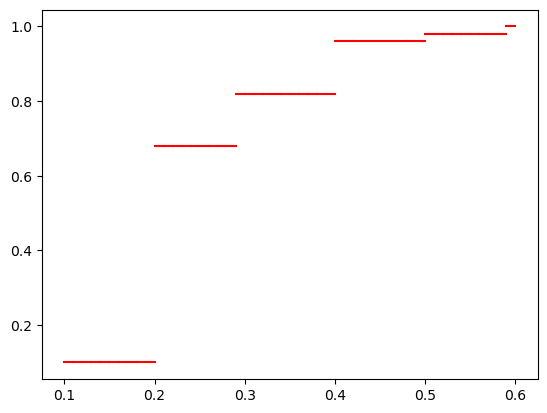

Валидационный ряд для графика эмпирической функции распределения:
[0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6]


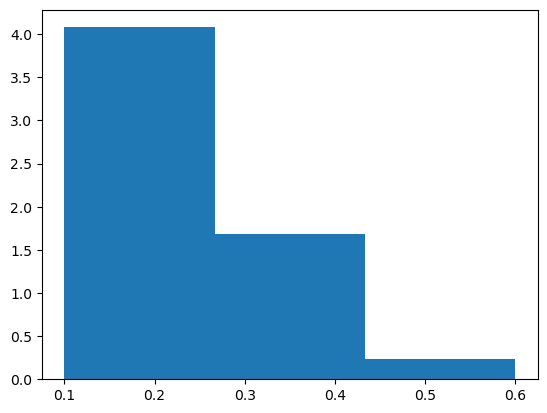

Данные для гистаграммы - значение и его количество в нашем входном списке:
{0.1: 5, 0.2: 29, 0.3: 7, 0.4: 7, 0.5: 1, 0.6: 1}


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


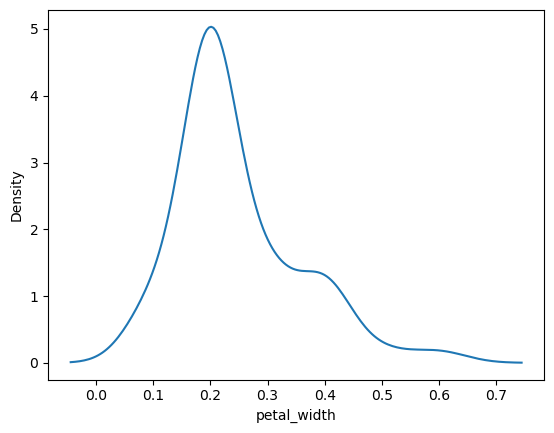

In [2]:
# 2.2
print("Пункт 2.2")
sample = list(np.reshape(df['petal_width'].values, -1, order='F'))
plot_emirical_cdf(sample)
print("Валидационный ряд для графика эмпирической функции распределения:")
print(sample)   # Валидационный ряд со значениями отчортированными по возрастанию

plt.hist(sample, density=True, bins=3)  # Гистаграма распределения
plt.show()

hist = {}                                           # Если бы я строил в ручную эту гистограмму, то воспользовался
buf = df['petal_width'][0]                          # бы данными из этого словаря - значение и его количество
n = 1                                               # в фрэйме
for i in range(1, df['petal_width'].shape[0]):      #
    if df['petal_width'][i] == buf:
        n += 1
    else:
        hist[buf] = n
        buf = df['petal_width'][i]
        n = 1
    if i == df['petal_width'].shape[0] - 1:
        hist[buf] = n
print("Данные для гистаграммы - значение и его количество в нашем входном списке:")
print(hist)

sb.distplot(df['petal_width'], hist=False)  # Ядерная оценка функции плотности
plt.show()

In [10]:
# 2.3
print('Пункт 2.3')
u = 2.57    # Из таблицы Стьюдента
n = (u*sample_variance)/(df.shape[0])**0.5    # Формула из лекции для нахождения доверительного интервала мат. ожидания при известной дисперсии
# Для получения более точного ответа, воспользуемся таблицей распределения хи квадрата из интернета
expected_value = sample_variance * df.shape[0]     # Это из формулы поиска доверительного интервала для дисперсии при известном мат. ожидании
q1 = 76.15    # Данные из таблицы распределения Хи-квадрата
q2 = 29.71
print("Доверительный интервал для мат. ожидания ищем по формуле через известную нам дисперсию")
print("А вот доверительный интервал для дисперсии ищем по формуле через известное выборочное среднее")
print('99% доверительный интервал для мат. ожидания - [', sample_mean-n, ';', sample_mean+n, ']',
          '\n99% доверительный интервал для дисперсии - [', expected_value/q1, ';', expected_value/q2, ']')

Пункт 2.3
Доверительный интервал для мат. ожидания ищем по формуле через известную нам дисперсию
А вот доверительный интервал для дисперсии ищем по формуле через известное выборочное среднее
99% доверительный интервал для мат. ожидания - [ 0.2420441787938927 ; 0.24995582120610724 ] 
99% доверительный интервал для дисперсии - [ 0.007146421536441239 ; 0.018317064961292505 ]


In [1]:
# 2.4
print("Пункт 2.4")
# Воспользуемся тут критерием Калмогорова, зная, что alpha = 0.01, сразу возьмём значение из таблицы
t = 1.6276
# Далее найдём наибольшее отклонение и вычислим значение критерия
fx = [0.1, 0.68, 0.82, 0.96, 0.98, 1]
# Последующий список я находил с помощью функции Лапласа, где значение справа равно Ф(((x[i] - x)/s), где s 'nj
f_x = [0.5 - 0.075, 0.5 - 0.024, 0.5 + 0.028, 0.5 + 0.08, 0.5 + 0.133, 0.5 + 0.1808]    # Тут воспользуемся
# функцией Лапласа
lamba = []
for i in range(len(fx)):
    if fx[i] > f_x[i]:
        lamba.append((fx[i] - f_x[i]))
    else:
        lamba.append(f_x[i] - fx[i])
print("Найдём наибольшее отклонение, затем сравниваем его с нашим значением критерия Колмагорова:")
print("F*(x)    F(x)    |F(x) - F*(x)|")
for i in range(len(fx)):
    print(f'{f_x[i]:.4f}', " ", f'{fx[i]:.2f}', "    ", f'{lamba[i]:.4f}')
maxi = max(lamba)*(50**0.5)   # Умножаем на корень количества всех символов
print("Получается, что lambda = ", maxi)
if maxi < t:
    print("Так как", maxi, "<", t,", то роаспределение можно считать нормальным на уровне значимости 0.01")
else:
    print("Так как", maxi, ">", t,", то распределение не является нормальным")

Пункт 2.4
Найдём наибольшее отклонение, затем сравниваем его с нашим значением критерия Колмагорова:
F*(x)    F(x)    |F(x) - F*(x)|
0.4250   0.10      0.3250
0.4760   0.68      0.2040
0.5280   0.82      0.2920
0.5800   0.96      0.3800
0.6330   0.98      0.3470
0.6808   1.00      0.3192
Получается, что lambda =  2.6870057685088806
Так как 2.6870057685088806 > 1.6276 , то распределение не является нормальным
